# Explore Exercises
- Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

- For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

#datetime utilities
from datetime import timedelta, datetime

#custom modules
import acquire
import prepare

#remove warnings
import warnings
warnings.filterwarnings("ignore")

In [41]:
# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

<hr style="border:2px solid black"> </hr>

## Store Data

In [3]:
#use prep_store function from prepare.py
store_df = prepare.prep_store()

In [5]:
#take a look at the data
store_df.head()

,item,sale_amount,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January,Tuesday,10.92
2013-01-01,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,Tuesday,218.40
2013-01-01,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,January,Tuesday,125.55
2013-01-01,12,54.0,213643,8,15000 San Pedro Ave,San Antonio,8,TX,78232,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,Tuesday,453.60
2013-01-01,12,35.0,215469,9,735 SW Military Dr,San Antonio,9,TX,78221,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,Tuesday,294.00


In [6]:
#check dtypes and size
store_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 to 2017-12-31
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item           913000 non-null  int64  
 1   sale_amount    913000 non-null  float64
 2   sale_id        913000 non-null  int64  
 3   store          913000 non-null  int64  
 4   store_address  913000 non-null  object 
 5   store_city     913000 non-null  object 
 6   store_id       913000 non-null  int64  
 7   store_state    913000 non-null  object 
 8   store_zipcode  913000 non-null  int64  
 9   item_brand     913000 non-null  object 
 10  item_id        913000 non-null  int64  
 11  item_name      913000 non-null  object 
 12  item_price     913000 non-null  float64
 13  item_upc12     913000 non-null  int64  
 14  item_upc14     913000 non-null  int64  
 15  month          913000 non-null  object 
 16  day_of_week    913000 non-null  object 
 17  sales_total  

### Split Data

In [16]:
#use percentage-based data split
train_size = .70
n = store_df.shape[0]
test_start_index = round(train_size * n)
test_start_index

In [ ]:
#everything up (not including) to the test_start_index
train = store_df[:test_start_index]
#everything from the test_start_index to the end
test = store_df[test_start_index:] 

### Visualize

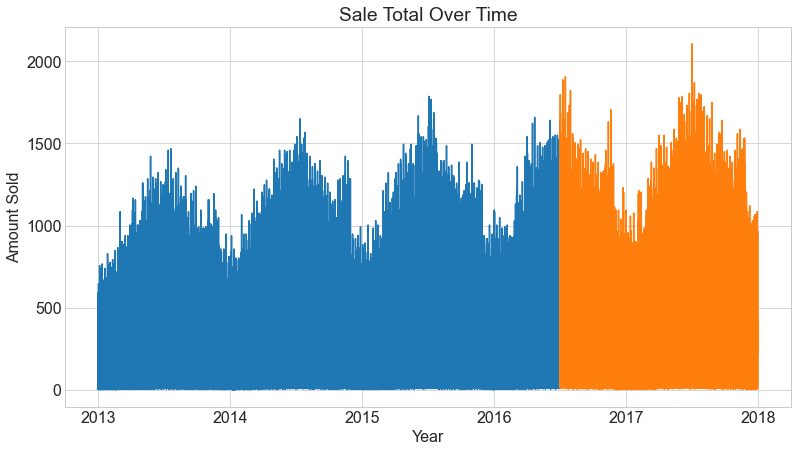

In [59]:
#plot train with target of sale amount
plt.plot(train.index, train.sales_total)
#plot test with target of sale amount
plt.plot(test.index, test.sales_total)

plt.title('Sale Total Over Time')

plt.ylabel('Amount Sold')
plt.xlabel('Year')

None

In [49]:
y = train.sales_total.resample('D').mean()
y.head()

sale_date
2013-01-01    147.68802
2013-01-02    147.14116
2013-01-03    156.33896
2013-01-04    168.93546
2013-01-05    175.24370
Freq: D, Name: sales_total, dtype: float64

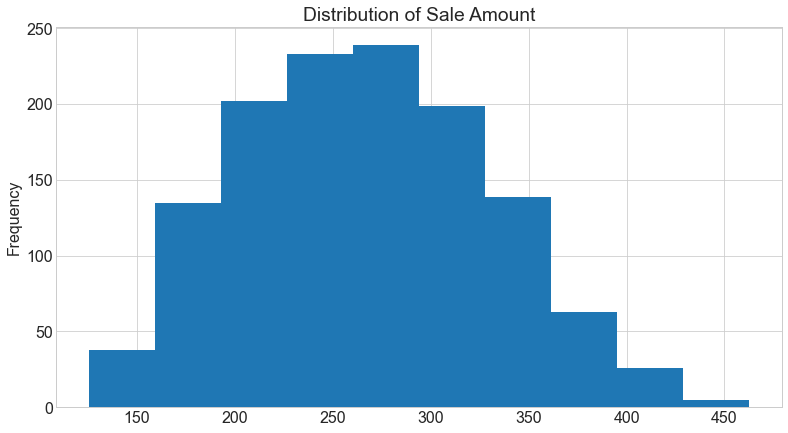

In [50]:
y.plot.hist()
plt.title('Distribution of Sale Amount')
plt.show()
#this shows a normal distribution with a right skew

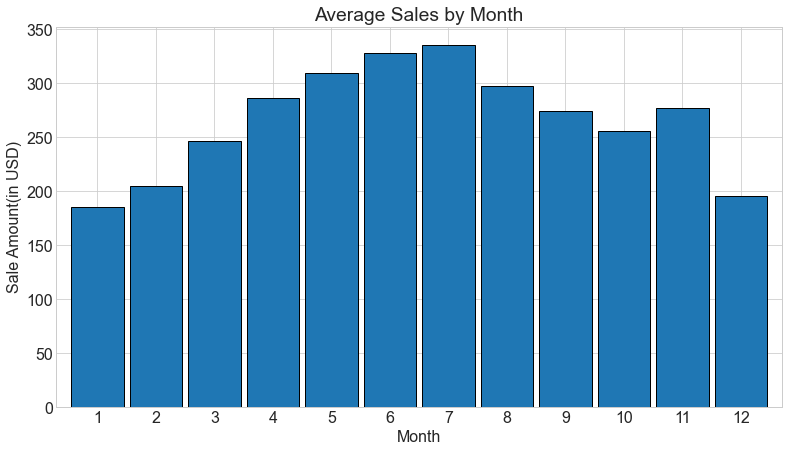

In [51]:
#graph average monthly sales
ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Sales by Month', xlabel='Month', ylabel='Sale Amount(in USD)')
plt.show()

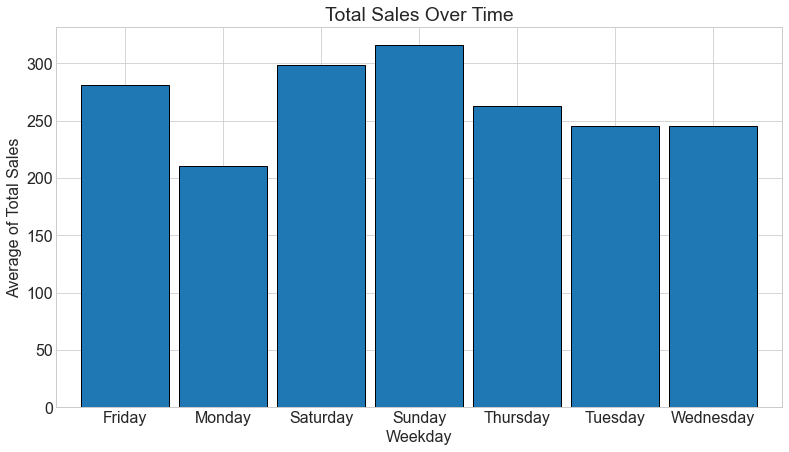

In [62]:
#graph average daily slaes
y.groupby(y.index.day_name()).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Total Sales by Weekday', xlabel='Weekday', ylabel='Sales (in USD)')
plt.title('Total Sales Over Time')
plt.xlabel('Weekday')
plt.ylabel('Average of Total Sales')
plt.show()

<AxesSubplot:xlabel='weekday', ylabel='sales_total'>

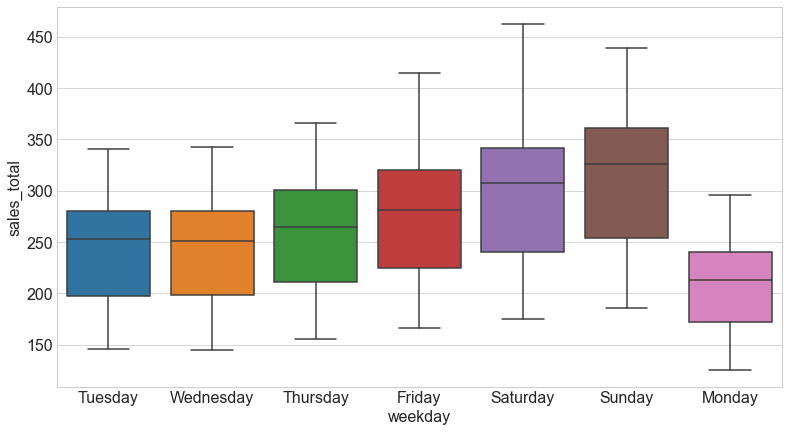

In [53]:
(y.reset_index().assign(weekday=lambda store_df: store_df.sale_date.dt.day_name()).pipe((sns.boxplot, 'data'), y='sales_total', x='weekday'))

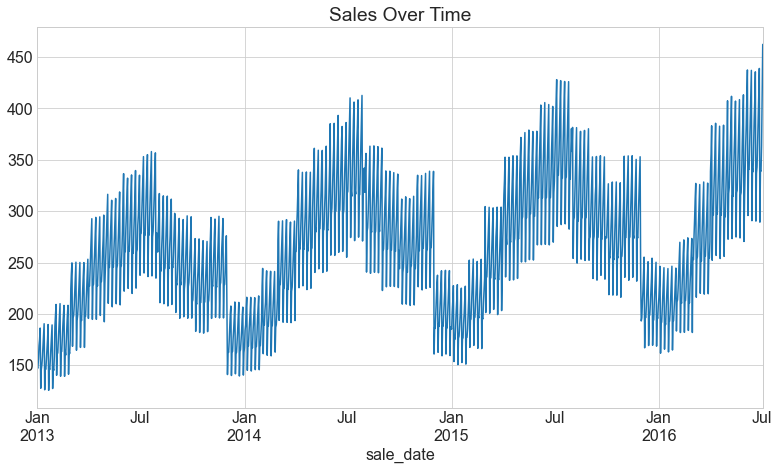

In [61]:
y.plot()
plt.title('Sales Over Time')
None

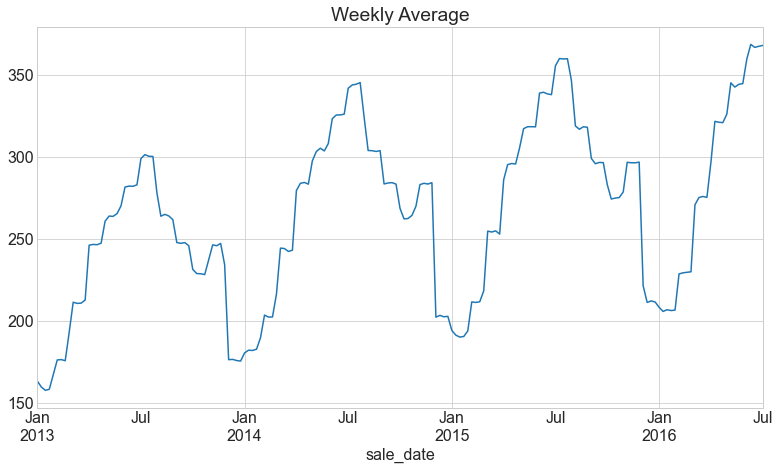

In [65]:
y.resample('W').mean().plot(title='Weekly Average')
None

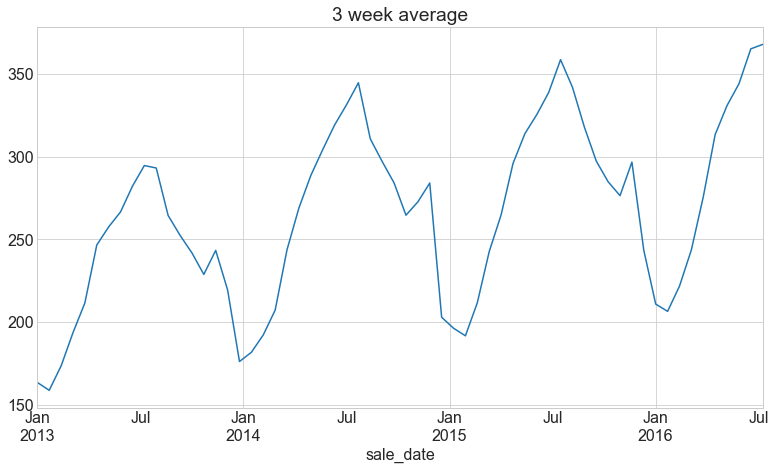

In [67]:
y.resample('3W').mean().plot(title='3 week average')
None

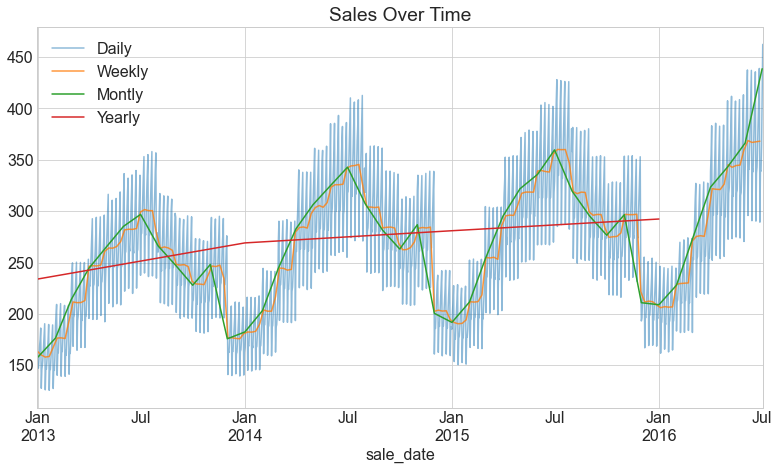

In [73]:
#y.plot(alpha=.2, label='Hourly') - There is no hourly data
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.title('Sales Over Time')
plt.legend()

None

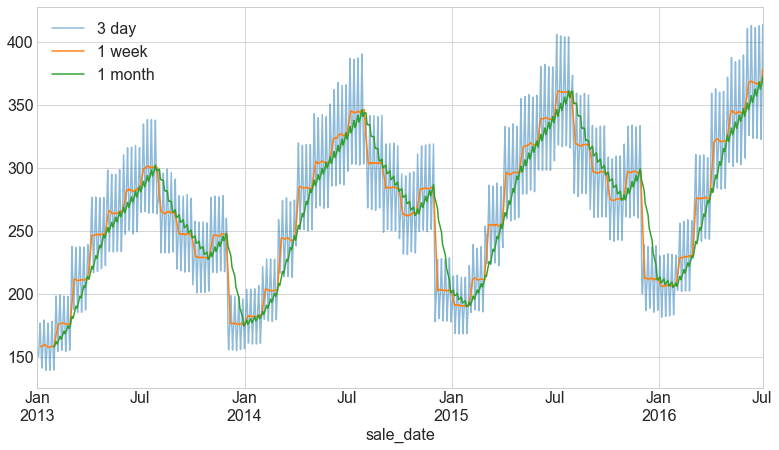

In [76]:
#plot rolling averages
y.resample('D').mean().rolling(3).mean().plot(alpha=.5, label='3 day')
y.resample('D').mean().rolling(7).mean().plot(alpha=8, label='1 week')
y.resample('D').mean().rolling(30).mean().plot(alpha=8, label='1 month')
plt.legend()
None

<AxesSubplot:title={'center':'Average week-to-week change in sale totals'}, xlabel='sale_date'>

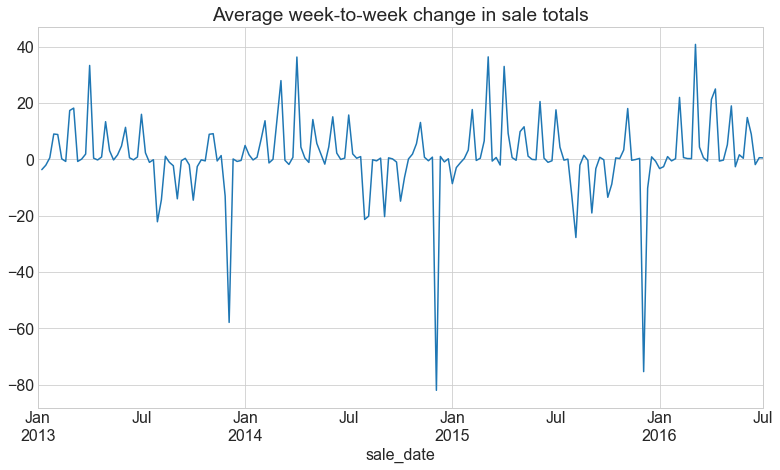

In [77]:
y.resample('W').mean().diff().plot(title='Average week-to-week change in sale totals')

<AxesSubplot:title={'center':'Average month-to-month change in sale tota'}, xlabel='sale_date'>

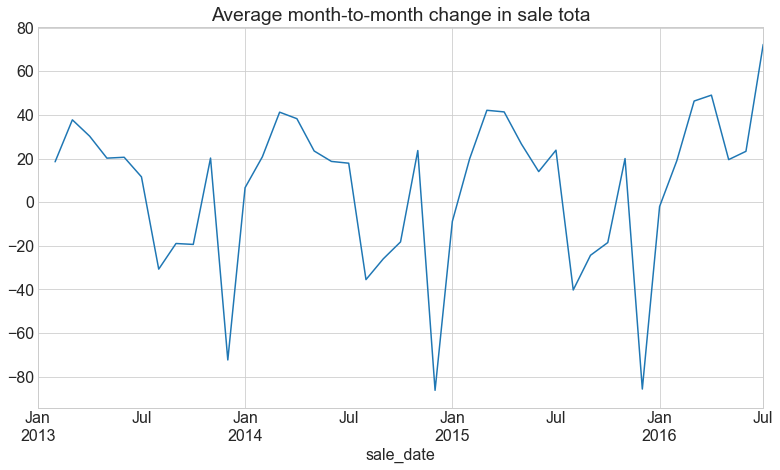

In [78]:
y.resample('M').mean().diff().plot(title='Average month-to-month change in sale tota')

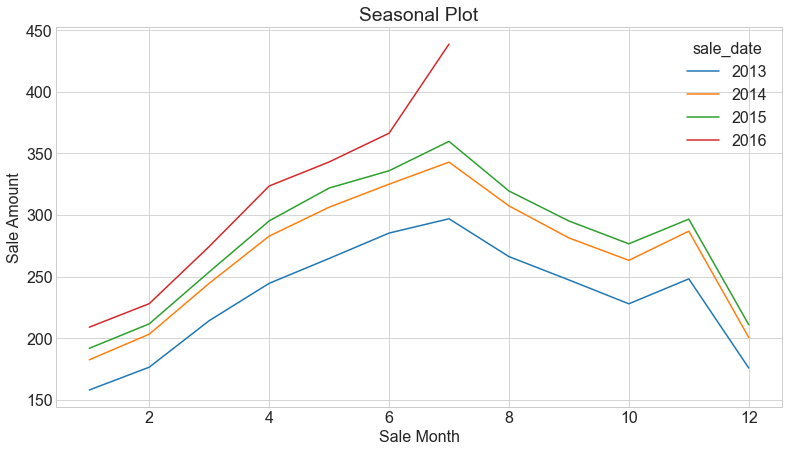

In [81]:
# .unstack turns an index level into columns
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')
plt.ylabel('Sale Amount')
plt.xlabel('Sale Month')
None

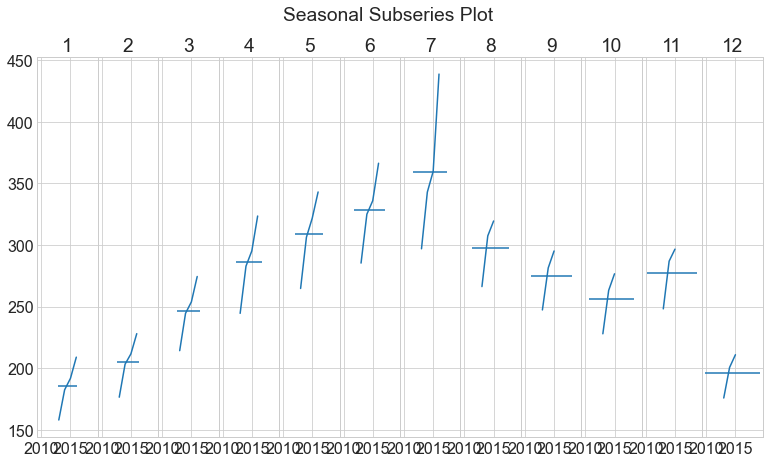

In [82]:
#Seasonal Subseries Plot
table = y.groupby([y.index.year, y.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')

#super-title for the overall figure
fig.suptitle('Seasonal Subseries Plot') 
fig.subplots_adjust(wspace=0)

Text(0.5, 1.0, 'Lag plot with lag=1')

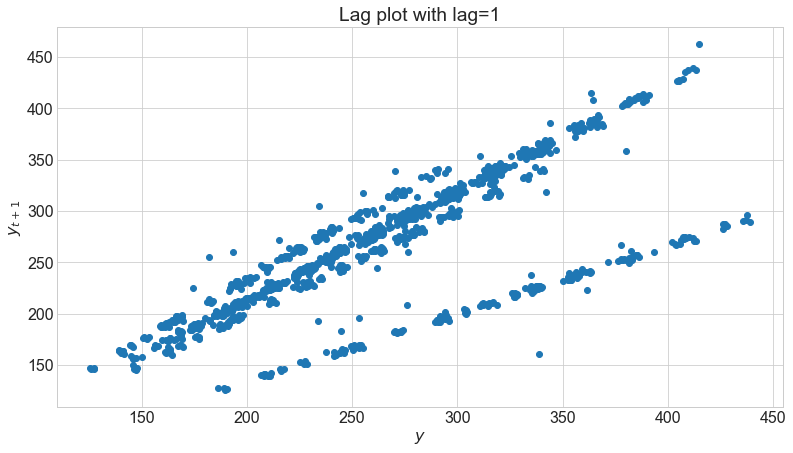

In [83]:
plt.scatter(y, y.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1')

[Text(0.5, 0, 't'), Text(0, 0.5, 't + 1')]

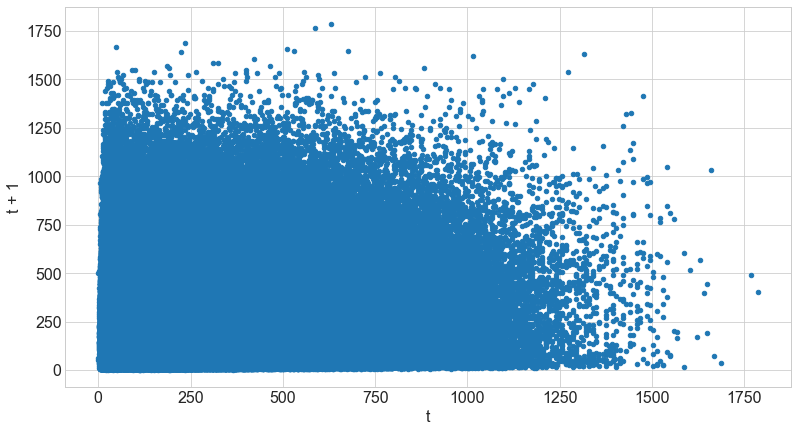

In [86]:
train['y(t + 1)'] = train.sales_total.shift(-1)
ax = train.plot.scatter(x='sales_total', y='y(t + 1)')
ax.set(xlabel='t', ylabel='t + 1')

In [87]:
del train['y(t + 1)']

,item,sale_amount,sale_id,store,store_id,store_zipcode,item_id,item_price,item_upc12,item_upc14,this_week,the_next_week
sale_date,,,,,,,,,,,,
2013-01-06,25.500000,30.355667,455590.50,5.500000,5.500000,78224.800000,25.500000,5.160400,2.384688e+11,2.384688e+11,163.589167,159.981203
2013-01-13,25.500000,29.686286,455597.00,5.500000,5.500000,78224.800000,25.500000,5.160400,2.384688e+11,2.384688e+11,159.981203,157.946720
2013-01-20,25.500000,29.414286,455604.00,5.500000,5.500000,78224.800000,25.500000,5.160400,2.384688e+11,2.384688e+11,157.946720,158.545383
2013-01-27,25.500000,29.513714,455611.00,5.500000,5.500000,78224.800000,25.500000,5.160400,2.384688e+11,2.384688e+11,158.545383,167.585014
2013-02-03,25.500000,31.150571,455618.00,5.500000,5.500000,78224.800000,25.500000,5.160400,2.384688e+11,2.384688e+11,167.585014,176.455603
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-06-05,25.500000,67.033714,456836.00,5.500000,5.500000,78224.800000,25.500000,5.160400,2.384688e+11,2.384688e+11,359.764591,368.762929
2016-06-12,25.500000,68.506000,456843.00,5.500000,5.500000,78224.800000,25.500000,5.160400,2.384688e+11,2.384688e+11,368.762929,366.946089
2016-06-19,25.500000,68.261143,456850.00,5.500000,5.500000,78224.800000,25.500000,5.160400,2.384688e+11,2.384688e+11,366.946089,367.585309


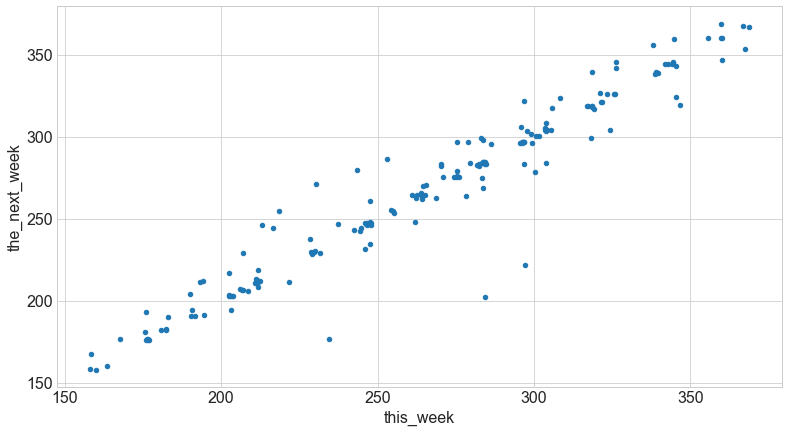

In [88]:
weekly = train.resample('W').mean()
weekly['the_next_week'] = weekly.sales_total.shift(-1)
weekly = weekly.rename(columns={'sales_total': 'this_week'})
weekly.plot.scatter(x='this_week', y='the_next_week')
weekly

##### This shows a positive correlation between this week's sales and next week's sales

,item,sale_amount,sale_id,store,store_id,store_zipcode,item_id,item_price,item_upc12,item_upc14,this_week,12_weeks_out
sale_date,,,,,,,,,,,,
2013-01-06,25.500000,30.355667,455590.50,5.500000,5.500000,78224.800000,25.500000,5.160400,2.384688e+11,2.384688e+11,163.589167,213.002663
2013-01-13,25.500000,29.686286,455597.00,5.500000,5.500000,78224.800000,25.500000,5.160400,2.384688e+11,2.384688e+11,159.981203,246.387280
2013-01-20,25.500000,29.414286,455604.00,5.500000,5.500000,78224.800000,25.500000,5.160400,2.384688e+11,2.384688e+11,157.946720,246.861371
2013-01-27,25.500000,29.513714,455611.00,5.500000,5.500000,78224.800000,25.500000,5.160400,2.384688e+11,2.384688e+11,158.545383,246.690086
2013-02-03,25.500000,31.150571,455618.00,5.500000,5.500000,78224.800000,25.500000,5.160400,2.384688e+11,2.384688e+11,167.585014,247.582229
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-06-05,25.500000,67.033714,456836.00,5.500000,5.500000,78224.800000,25.500000,5.160400,2.384688e+11,2.384688e+11,359.764591,NaN
2016-06-12,25.500000,68.506000,456843.00,5.500000,5.500000,78224.800000,25.500000,5.160400,2.384688e+11,2.384688e+11,368.762929,NaN
2016-06-19,25.500000,68.261143,456850.00,5.500000,5.500000,78224.800000,25.500000,5.160400,2.384688e+11,2.384688e+11,366.946089,NaN


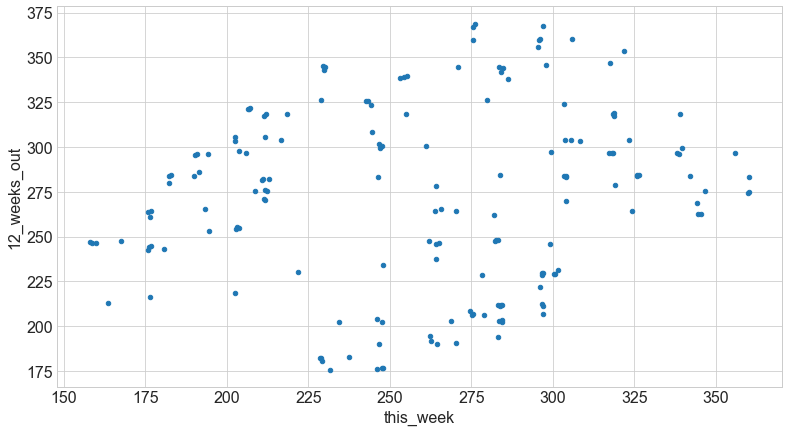

In [89]:
weekly = train.resample('W').mean()
weekly['12_weeks_out'] = weekly.sales_total.shift(-12)
weekly = weekly.rename(columns={'sales_total': 'this_week'})
weekly.plot.scatter(x='this_week', y='12_weeks_out')
weekly

#### There does not appear to be any correlation between this week's sales and the sales in 4 months

,item,sale_amount,sale_id,store,store_id,store_zipcode,item_id,item_price,item_upc12,item_upc14,this_week,half_a_year_later
sale_date,,,,,,,,,,,,
2013-01-06,25.500000,30.355667,455590.50,5.500000,5.500000,78224.800000,25.500000,5.160400,2.384688e+11,2.384688e+11,163.589167,299.209394
2013-01-13,25.500000,29.686286,455597.00,5.500000,5.500000,78224.800000,25.500000,5.160400,2.384688e+11,2.384688e+11,159.981203,301.578849
2013-01-20,25.500000,29.414286,455604.00,5.500000,5.500000,78224.800000,25.500000,5.160400,2.384688e+11,2.384688e+11,157.946720,300.565134
2013-01-27,25.500000,29.513714,455611.00,5.500000,5.500000,78224.800000,25.500000,5.160400,2.384688e+11,2.384688e+11,158.545383,300.484531
2013-02-03,25.500000,31.150571,455618.00,5.500000,5.500000,78224.800000,25.500000,5.160400,2.384688e+11,2.384688e+11,167.585014,278.376257
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-06-05,25.500000,67.033714,456836.00,5.500000,5.500000,78224.800000,25.500000,5.160400,2.384688e+11,2.384688e+11,359.764591,NaN
2016-06-12,25.500000,68.506000,456843.00,5.500000,5.500000,78224.800000,25.500000,5.160400,2.384688e+11,2.384688e+11,368.762929,NaN
2016-06-19,25.500000,68.261143,456850.00,5.500000,5.500000,78224.800000,25.500000,5.160400,2.384688e+11,2.384688e+11,366.946089,NaN


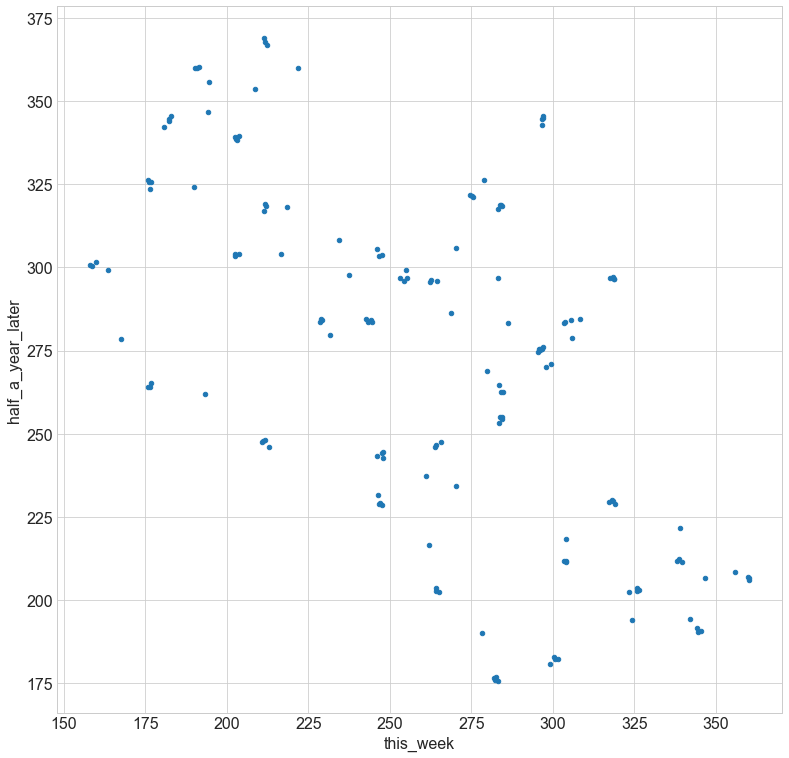

In [90]:
weekly = train.resample('W').mean()
weekly['half_a_year_later'] = weekly.sales_total.shift(-26)
weekly = weekly.rename(columns={'sales_total': 'this_week'})
weekly.plot.scatter(x='this_week', y='half_a_year_later', figsize=(13, 13))
weekly

#### There is beginning to be a negative correlation between this week's sales and the sales in 6 months

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 26)'>

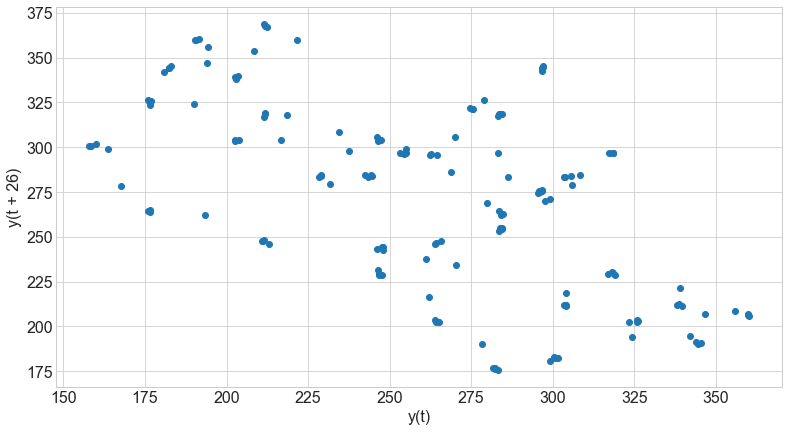

In [92]:
# can use lag_plot also to show the same thing
pd.plotting.lag_plot(train.sales_total.resample('W').mean(), lag=26)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

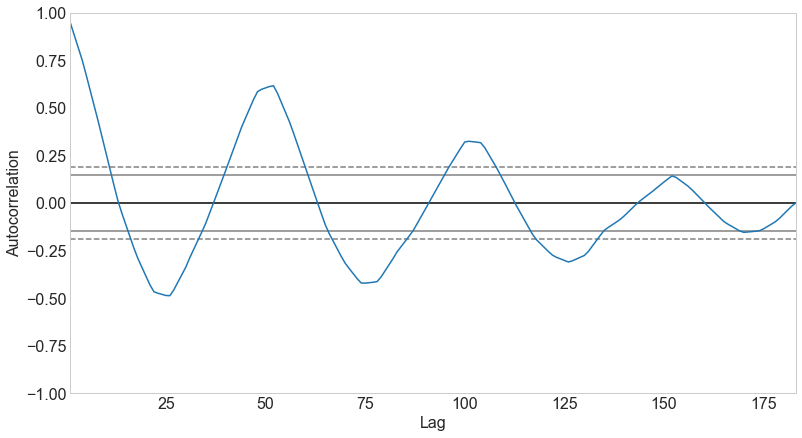

In [93]:
#autocorrelation
pd.plotting.autocorrelation_plot(train.sales_total.resample('W').mean())

In [94]:
y = train.sales_total.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
sale_date,,,,
2013-01-06,163.589167,NaN,-77.817427,NaN
2013-01-13,159.981203,NaN,-76.420498,NaN
2013-01-20,157.946720,NaN,-77.661680,NaN
2013-01-27,158.545383,NaN,-77.653889,NaN
2013-02-03,167.585014,NaN,-73.077372,NaN


<AxesSubplot:xlabel='sale_date'>

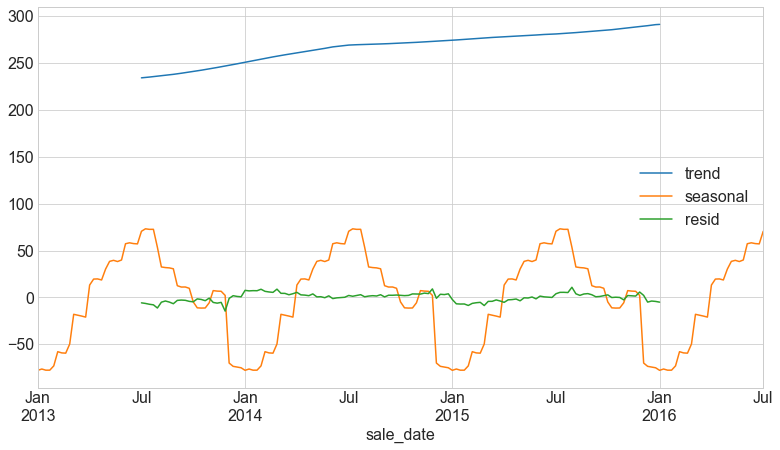

In [95]:
decomposition.iloc[:, 1:].plot()

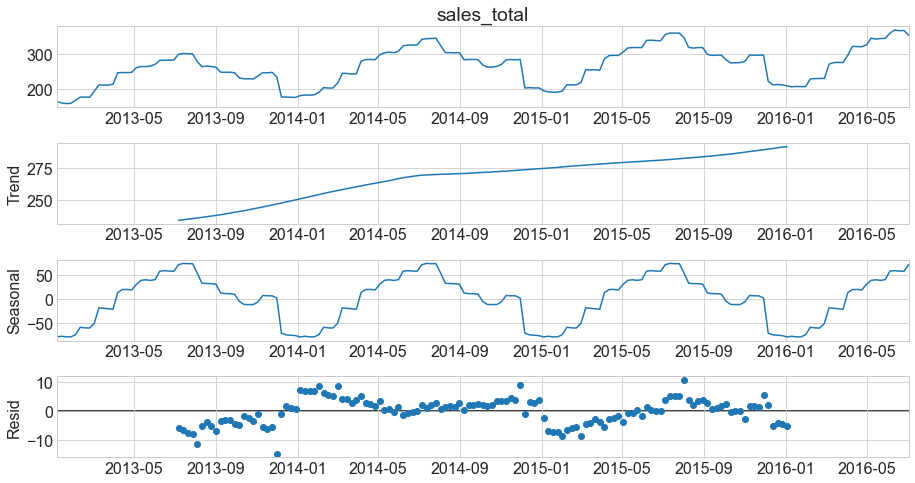

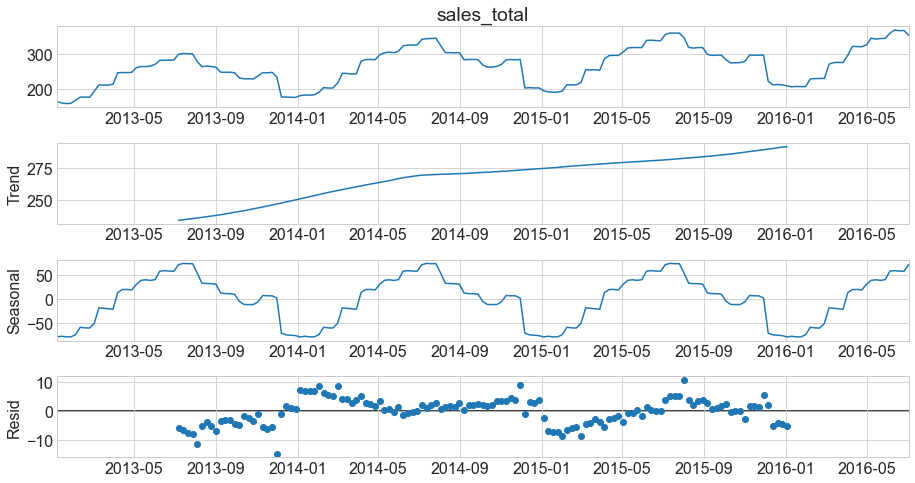

In [96]:
result.plot()

In [97]:
train.sales_total.describe()
#this way i can figure out what bins to use

count    639100.000000
mean        265.689208
std         214.904796
min           0.000000
25%          93.000000
50%         220.080000
75%         380.600000
max        1785.560000
Name: sales_total, dtype: float64

In [98]:
train = train.resample('D').mean()
#create a categorical feature
train['sales_bin'] = pd.qcut(train.sales_total, 3, labels=['high_sale', 'mid_sale', 'low_sale'])
train.groupby('sales_bin').mean()

,item,sale_amount,sale_id,store,store_id,store_zipcode,item_id,item_price,item_upc12,item_upc14,sales_total
sales_bin,,,,,,,,,,,
high_sale,25.500000,36.404993,456092.714286,5.500000,5.500000,78224.800000,25.500000,5.160400,2.384688e+11,2.384688e+11,195.743931
mid_sale,25.500000,49.054831,456213.086854,5.500000,5.500000,78224.800000,25.500000,5.160400,2.384688e+11,2.384688e+11,263.746919
low_sale,25.499319,62.880920,456363.897981,5.500446,5.500446,78224.808075,25.499319,5.160884,2.384536e+11,2.384536e+11,338.110364


Text(0, 0.5, '% of days in the month')

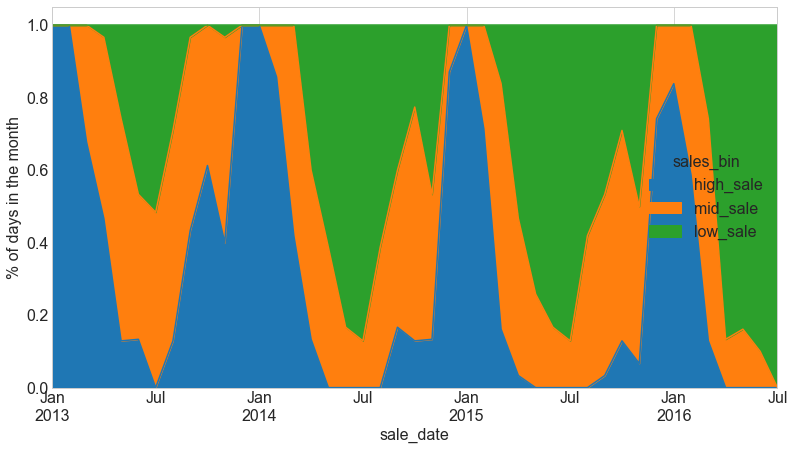

In [99]:
(train.groupby('sales_bin')
 .resample('M')
 .size()
 .unstack(0)
 .apply(lambda row: row / row.sum(), axis=1)
 .plot.area()
)
plt.ylabel('% of days in the month')

[Text(0, 0, 'January'),
 Text(1, 0, 'February'),
 Text(2, 0, 'March'),
 Text(3, 0, 'April'),
 Text(4, 0, 'May'),
 Text(5, 0, 'June'),
 Text(6, 0, 'July'),
 Text(7, 0, 'August'),
 Text(8, 0, 'September'),
 Text(9, 0, 'October'),
 Text(10, 0, 'November'),
 Text(11, 0, 'December')]

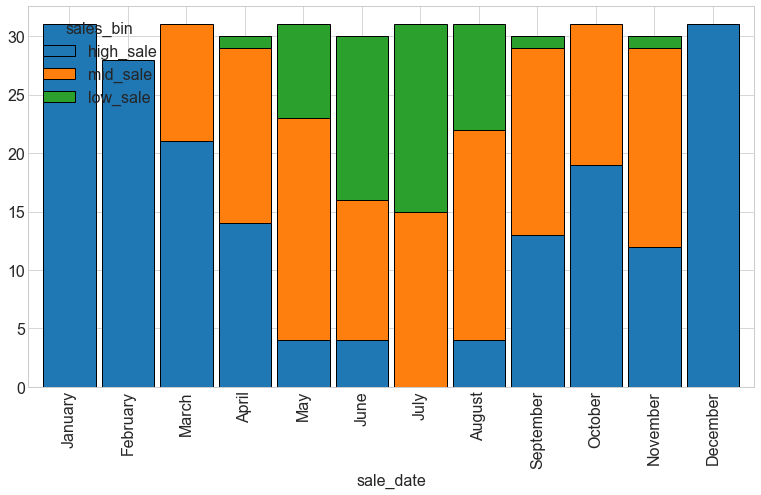

In [100]:
ax = (train['2013']
 .groupby('sales_bin')
 .resample('M')
 .size()
 .unstack(0)
 .plot.bar(stacked=True, width=.9, ec='black')
)
labels = [pd.to_datetime(t.get_text()).strftime('%B') for t in ax.get_xticklabels()]
ax.set_xticklabels(labels)

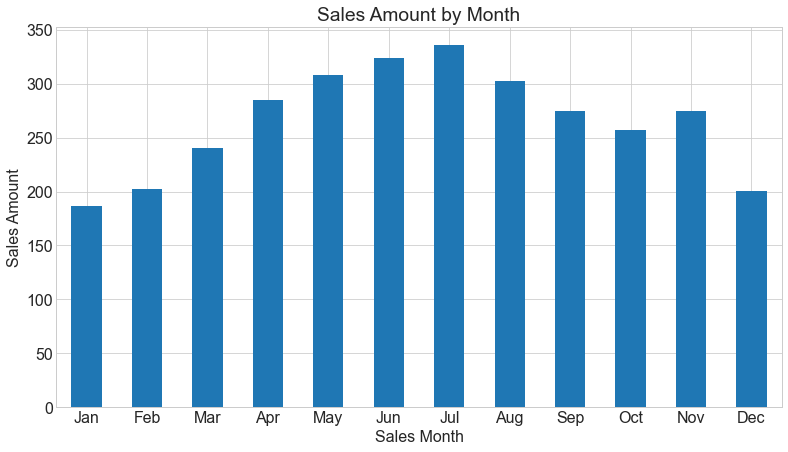

In [103]:
#tstrftime
ax = y.groupby(y.index.strftime('%m-%b')).mean().plot.bar()
ax.set_xticklabels([t.get_text()[3:] for t in ax.get_xticklabels()], rotation=0)
plt.xlabel('Sales Month')
plt.ylabel('Sales Amount')
plt.title('Sales Amount by Month')
None

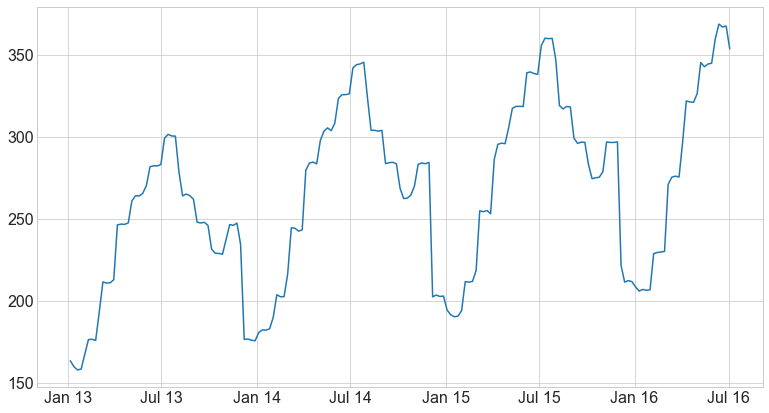

In [104]:
from matplotlib.dates import DateFormatter

fig, ax = plt.subplots()

weekly = y.resample('W').mean()

ax.plot(weekly.index, weekly)

ax.xaxis.set_major_formatter(DateFormatter('%b %y'))

<hr style="border:3px solid black"> </hr>

## Germany Data

In [128]:
df= acquire.get_germany_data()

In [130]:
df.Date = df.Date.astype('datetime64[ns]')

In [131]:
df.dtypes

Date           datetime64[ns]
Consumption           float64
Wind                  float64
Solar                 float64
Wind+Solar            float64
dtype: object

In [132]:
#must complete step 2&3 (set date as index and sort)
df = df.set_index('Date').sort_index()

In [133]:
#create column to identify month!
df['month'] = df.index.month_name()

In [134]:
#create column to identify month!
df['day_of_week'] = df.index.day_name()

In [135]:
#create column to identify month!
df['year'] = df.index.year

In [136]:
#fill nulls
df = df.fillna(0)

In [137]:
germany_df = df

In [138]:
germany_df

,Consumption,Wind,Solar,Wind+Solar,month,day_of_week,year
Date,,,,,,,
2006-01-01,1069.18400,0.000,0.000,0.000,January,Sunday,2006
2006-01-02,1380.52100,0.000,0.000,0.000,January,Monday,2006
2006-01-03,1442.53300,0.000,0.000,0.000,January,Tuesday,2006
2006-01-04,1457.21700,0.000,0.000,0.000,January,Wednesday,2006
2006-01-05,1477.13100,0.000,0.000,0.000,January,Thursday,2006
...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,December,Wednesday,2017
2017-12-28,1299.86398,506.424,14.162,520.586,December,Thursday,2017
2017-12-29,1295.08753,584.277,29.854,614.131,December,Friday,2017


In [140]:
type(germany_df.index)

pandas.core.indexes.datetimes.DatetimeIndex

### Split Data

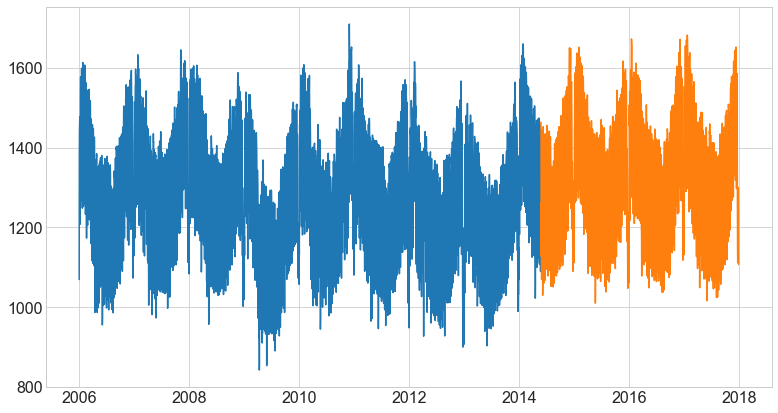

In [141]:
#percentage based
train_size = .70
n = germany_df.shape[0]
test_start_index = round(train_size * n)

train = germany_df[:test_start_index] # everything up (not including) to the test_start_index
test = germany_df[test_start_index:] # everything from the test_start_index to the end

plt.plot(train.index, train.Consumption)
plt.plot(test.index, test.Consumption)

### Visualizations

In [142]:
y = train.Consumption
y.head()

Date
2006-01-01    1069.184
2006-01-02    1380.521
2006-01-03    1442.533
2006-01-04    1457.217
2006-01-05    1477.131
Name: Consumption, dtype: float64

<AxesSubplot:ylabel='Frequency'>

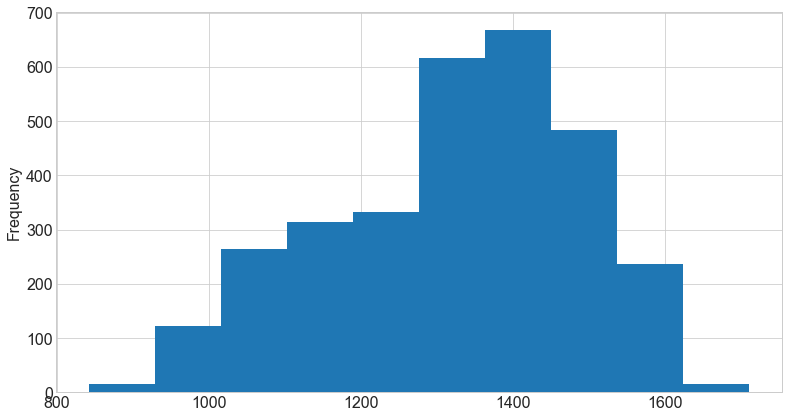

In [143]:
#plot distribution
y.plot.hist()

#shows normal distribution with left skew

[Text(0.5, 1.0, 'Average Consumption by Month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Consumption')]

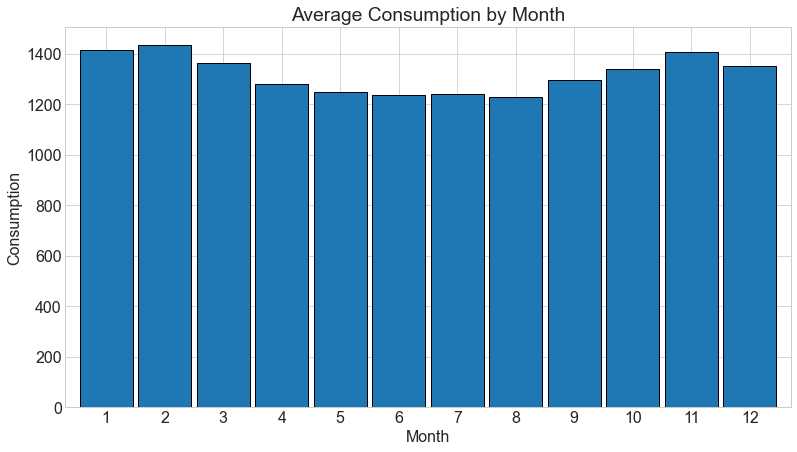

In [144]:
ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Consumption by Month', xlabel='Month', ylabel='Consumption')

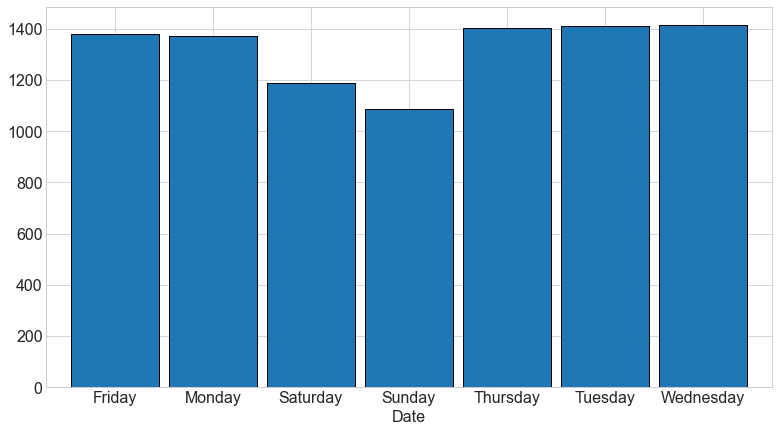

In [146]:
y.groupby(y.index.day_name()).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Consumption by Weekday', xlabel='Weekday', ylabel='Consumption')
None

<AxesSubplot:xlabel='weekday', ylabel='Consumption'>

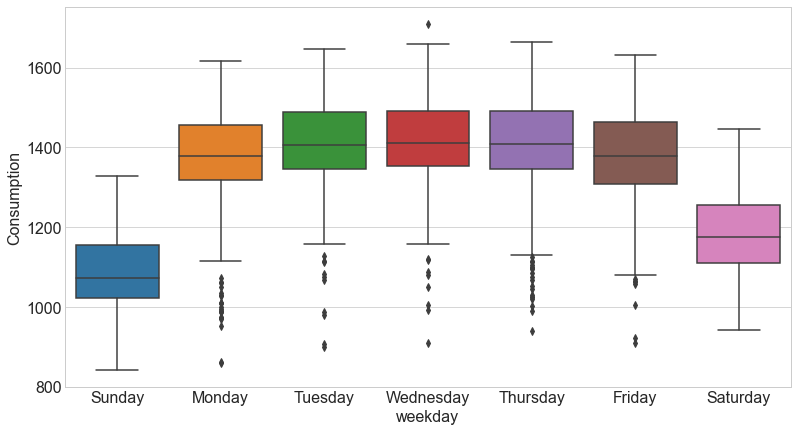

In [147]:
(
    y.reset_index()
    .assign(weekday=lambda df: df.Date.dt.day_name())
    .pipe((sns.boxplot, 'data'), y='Consumption', x='weekday')
)

<AxesSubplot:xlabel='Date'>

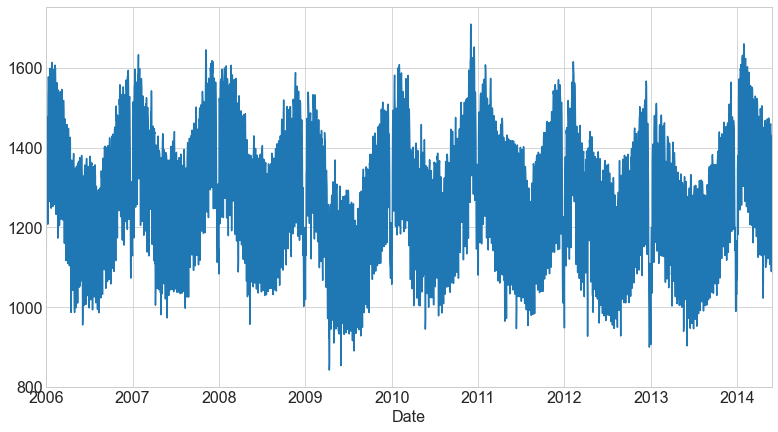

In [149]:
#target over time
y.plot()

<AxesSubplot:title={'center':'2 week average'}, xlabel='Date'>

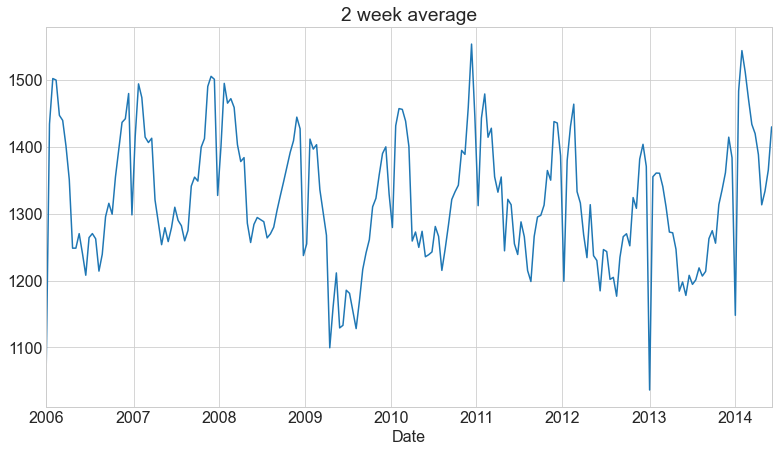

In [150]:
y.resample('2W').mean().plot(title='2 week average')

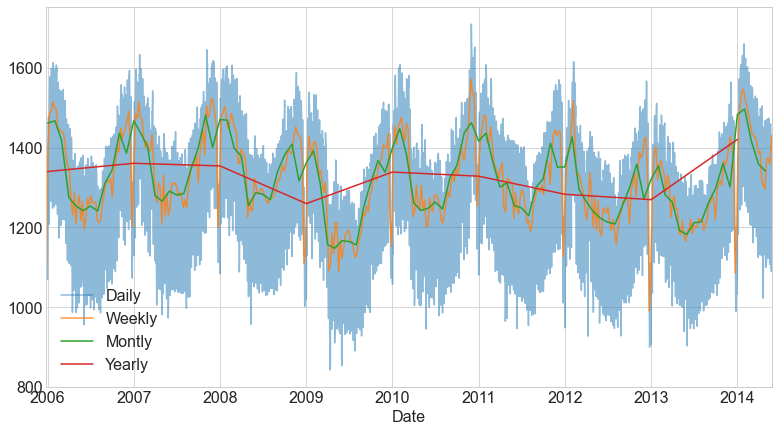

In [153]:
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()
None

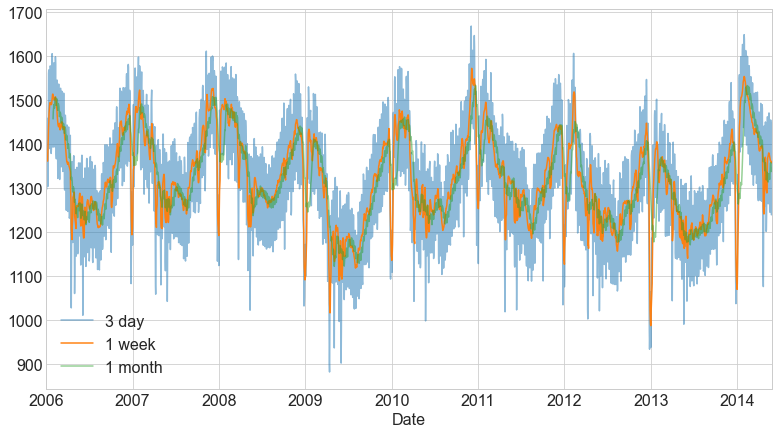

In [155]:
#rolling average
y.resample('D').mean().rolling(3).mean().plot(alpha=.5, label='3 day')
y.resample('D').mean().rolling(7).mean().plot(alpha=8, label='1 week')
y.resample('D').mean().rolling(30).mean().plot(alpha=.5, label='1 month')
plt.legend()
None

<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='Date'>

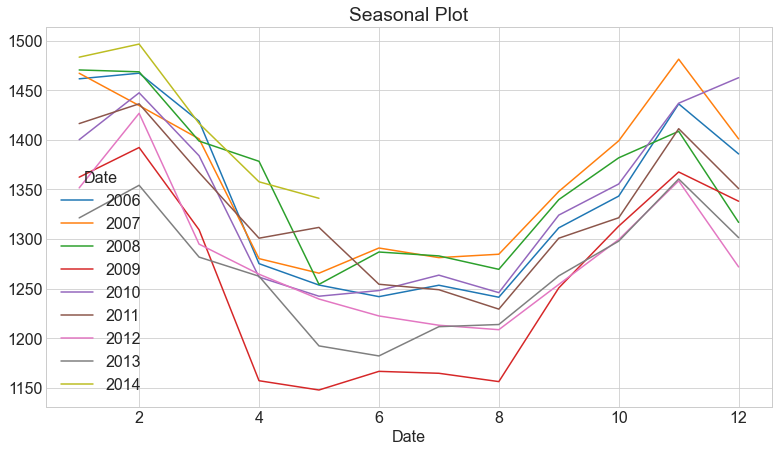

In [156]:
#Seasonal Plot
# .unstack turns an index level into columns
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')

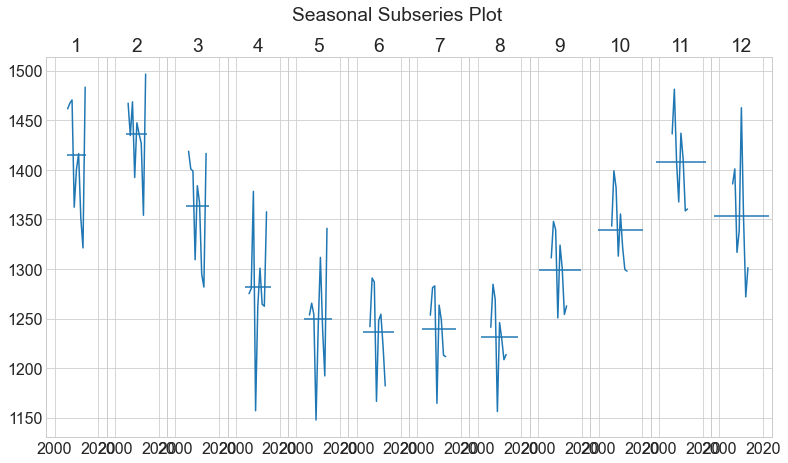

In [157]:
#seasonal subseries plot
table = y.groupby([y.index.year, y.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

Text(0.5, 1.0, 'Lag plot with lag=1')

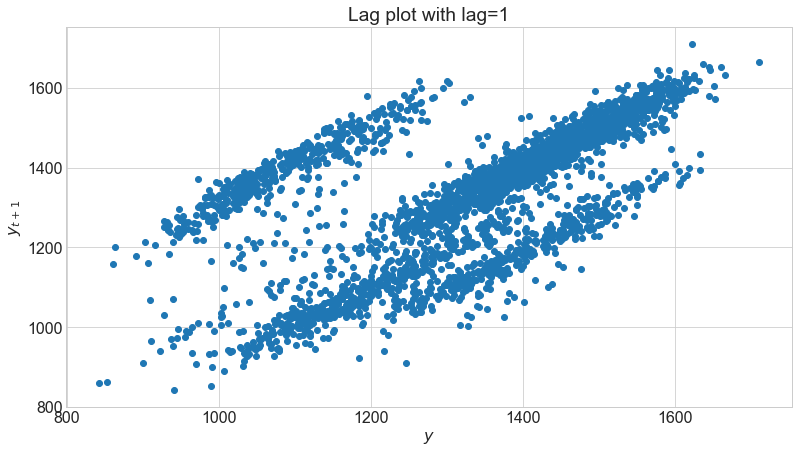

In [158]:
#Lag Plot
plt.scatter(y, y.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1')

,this_week,Wind,Solar,Wind+Solar,year,the_next_week
Date,,,,,,
2006-01-01,1069.184000,0.000000,0.000000,0.000000,2006.0,1381.300143
2006-01-08,1381.300143,0.000000,0.000000,0.000000,2006.0,1486.730286
2006-01-15,1486.730286,0.000000,0.000000,0.000000,2006.0,1490.031143
2006-01-22,1490.031143,0.000000,0.000000,0.000000,2006.0,1514.176857
2006-01-29,1514.176857,0.000000,0.000000,0.000000,2006.0,1501.403286
...,...,...,...,...,...,...
2014-05-04,1295.405714,52.989714,110.741857,163.731571,2014.0,1372.166000
2014-05-11,1372.166000,204.100143,124.597143,328.697286,2014.0,1372.636143
2014-05-18,1372.636143,117.518286,131.462000,248.980286,2014.0,1357.924714


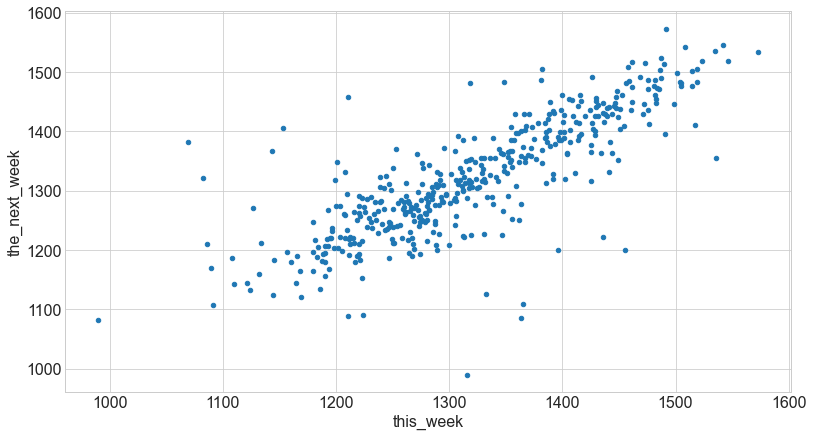

In [159]:
weekly = train.resample('W').mean()
weekly['the_next_week'] = weekly.aConsumption.shift(-1)
weekly = weekly.rename(columns={'Consumption': 'this_week'})
weekly.plot.scatter(x='this_week', y='the_next_week')
weekly

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

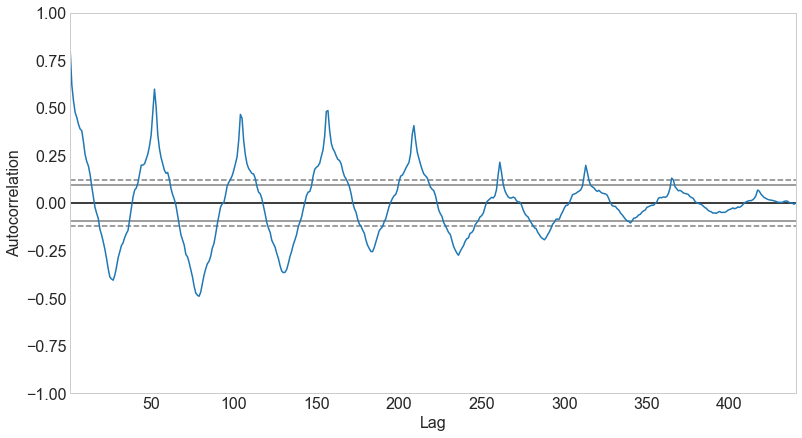

In [160]:
#Autocorrelation Plot
pd.plotting.autocorrelation_plot(train.Consumption.resample('W').mean())

In [161]:
#Seasonal Decomposition
y = train.Consumption.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
Date,,,,
2006-01-01,1069.184000,NaN,-68.437315,NaN
2006-01-08,1381.300143,NaN,-125.834756,NaN
2006-01-15,1486.730286,NaN,35.842411,NaN
2006-01-22,1490.031143,NaN,106.451350,NaN
2006-01-29,1514.176857,NaN,122.022124,NaN


<AxesSubplot:xlabel='Date'>

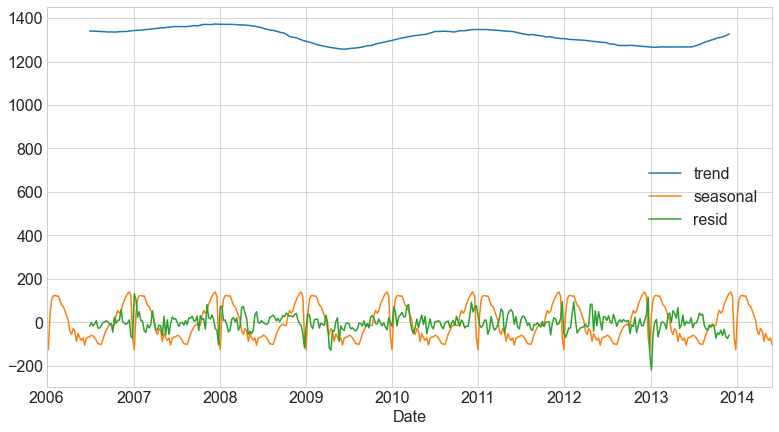

In [162]:
decomposition.iloc[:, 1:].plot()

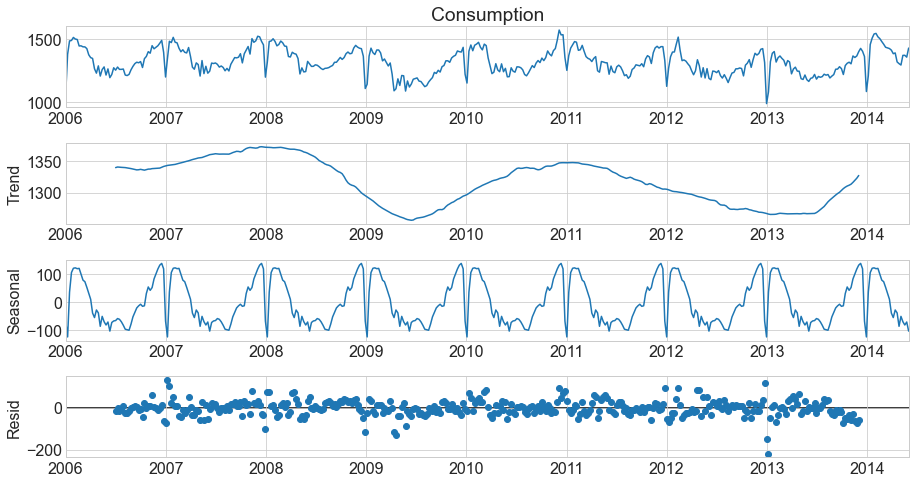

In [163]:
# the value returned from seasonal_decompose can itself be plotted:
result.plot()
None

In [165]:
train = train.resample('D').mean()
# create a categorical feature
train['Consumption_bin'] = pd.qcut(train.Consumption, 3, labels=['High Consumption', 'Average Consumption', 'Low Consumption'])
train.groupby('Consumption_bin').mean()

,Consumption,Wind,Solar,Wind+Solar,year
Consumption_bin,,,,,
High Consumption,1125.874587,65.577156,26.331001,69.319043,2009.879765
Average Consumption,1345.901834,59.831141,29.165084,65.998640,2009.715264
Low Consumption,1493.085339,66.784214,13.010112,46.922207,2009.548387
